In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "4"

import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from multiprocessing import Pool
from IPython.display import display, Math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as tck


import scipy.stats as stats

import pandas as pd
import pickle


In [2]:
TIC = 'TIC 420779000' #HAT-P-26b / TIC 420779000

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))

HAT_P_26b_lc = lc.remove_nans()

#Removing an outlier

t = []
flux_data = []
yerrs = []

for time, flux, yerr in zip(lc.time.btjd, lc.flux, lc.flux_err):
    if flux <= 1.014: #Include fluxes below or equal to this value
        t.append(time)
        flux_data.append(flux)
        yerrs.append(yerr)

HAT_P_26b_t = np.array(t)
HAT_P_26b_flux_data = np.array(flux_data)
HAT_P_26b_yerrs = np.array(yerrs)

trying to download
Search done
LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 420779000" SECTOR=50 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [3]:
TIC = 'TIC 292152376' #HAT-P-32b / TIC 292152376 

search_result = lk.search_lightcurve(
    target=TIC,
    mission='TESS', author='SPOC')
print("trying to download")
lc_collection = search_result.download_all()
print("Search done")
print(lc_collection)
lc = lc_collection.stitch(corrector_func=lambda x: x.
                          remove_nans().normalize(unit='unscaled'))

lc = lc_collection[0] #Choose one
lc = lc.remove_nans()
HAT_P_32b_lc = lc.normalize()

trying to download
Search done
LightCurveCollection of 2 objects:
    0: <TessLightCurve LABEL="TIC 292152376" SECTOR=58 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 292152376" SECTOR=58 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>


In [4]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_26b\gp_batman_model\free_ecc\HAT_P_26b_model_flux.p"

with open(filename, "rb") as f:
    HAT_P_26b_model_flux = pickle.load(f)
f.close()

In [5]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_32b\gp_batman_model\free_ecc\HAT_P_32b_model_flux.p"

with open(filename, "rb") as f:
    HAT_P_32b_model_flux = pickle.load(f)
f.close()

In [6]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_26b\gp_batman_model\free_ecc\HAT_P_26b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
     HAT_P_26b_residuals = pickle.load(f)
f.close()

In [7]:
filename = r"C:\Users\Student\OneDrive\MSci project\MSci2022_TESS\Transit_fitting\HAT_P_32b\gp_batman_model\free_ecc\HAT_P_32b_residuals_gp_batman_w_flux.p"

with open(filename, "rb") as f:
     HAT_P_32b_residuals = pickle.load(f)
f.close()

In [8]:
HAT_P_26b_residuals_mean = np.mean(HAT_P_26b_residuals)
HAT_P_26b_residuals_sigma = np.std(HAT_P_26b_residuals)

HAT_P_32b_residuals_mean = np.mean(HAT_P_32b_residuals)
HAT_P_32b_residuals_sigma = np.std(HAT_P_32b_residuals)

x = np.linspace(-0.014, 0.014, 1000)

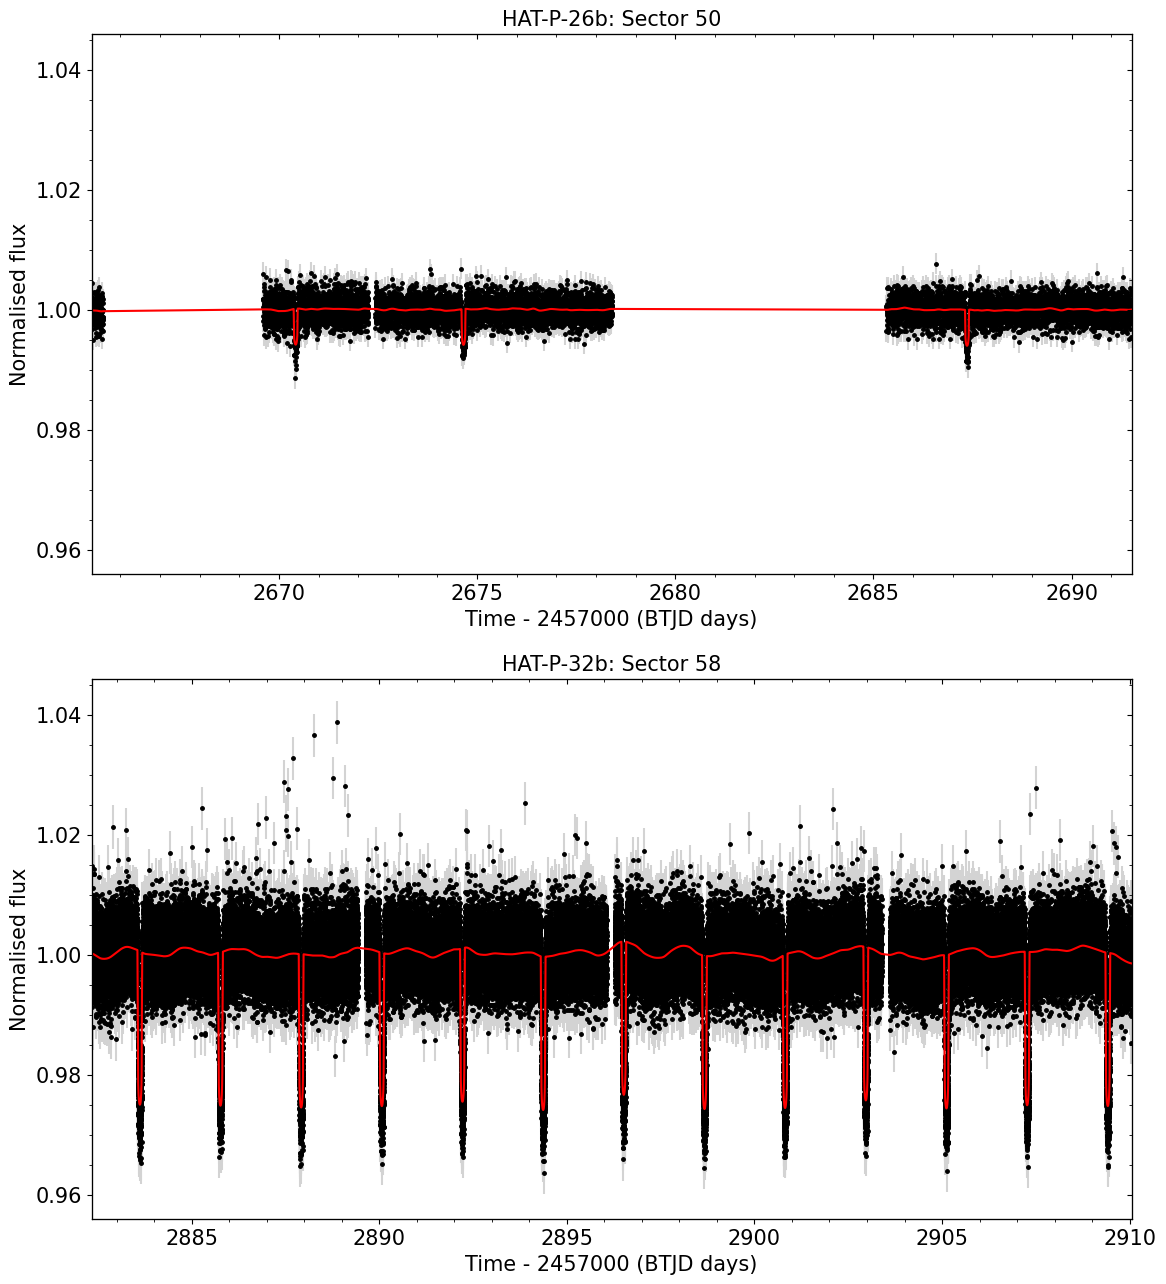

In [9]:
fontsize = 15

#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -height -1.075
w_spacing = 0.075


rect1 = [left, bottom, width, height]
rect3 = [left, bottom+height+spacing, width, height]

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes(rect1)
ax3 = fig.add_axes(rect3)


"""
HAT-P-26b, Sector 50
"""
ax1.set_title("HAT-P-26b: Sector 50", size=fontsize)
ax1.errorbar(np.array(HAT_P_26b_t), np.array(HAT_P_26b_flux_data), yerr=np.array(HAT_P_26b_yerrs), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax1.plot(np.array(HAT_P_26b_t), HAT_P_26b_model_flux, color='Red', zorder=10)
ax1.set_xlim(min(HAT_P_26b_t), max(HAT_P_26b_t))
ax1.set_ylim([0.956, 1.046])
ax1.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax1.set_ylabel("Normalised flux", size=fontsize)

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)

ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1y.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
HAT-P-32b, Sector 58
"""
ax3.set_title("HAT-P-32b: Sector 58", size=fontsize)
ax3.errorbar(np.array(HAT_P_32b_lc.time.btjd), np.array(HAT_P_32b_lc.flux), yerr=np.array(HAT_P_32b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax3.plot(np.array(HAT_P_32b_lc.time.btjd), HAT_P_32b_model_flux, color='Red', zorder=10)
ax3.set_xlim(min(HAT_P_32b_lc.time.btjd), max(HAT_P_32b_lc.time.btjd))
ax3.set_ylim(ax1.get_ylim())
ax3.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax3.set_ylabel("Normalised flux", size=fontsize)

ax3.yaxis.set_tick_params(labelsize=fontsize)
ax3.xaxis.set_tick_params(labelsize=fontsize)

# Mirror y
ax3y = ax3.twinx()
ax3y.set_ylim(ax3.get_ylim())
ax3y.get_yaxis().set_ticklabels([])
ax3y.tick_params(which="both", direction="in")

# Mirror x
ax3x = ax3.twiny()
ax3x.set_xlim(ax3.get_xlim())
ax3x.get_xaxis().set_ticklabels([])
ax3x.tick_params(which="both", direction="in")

ax3.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax3.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax3y.yaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()

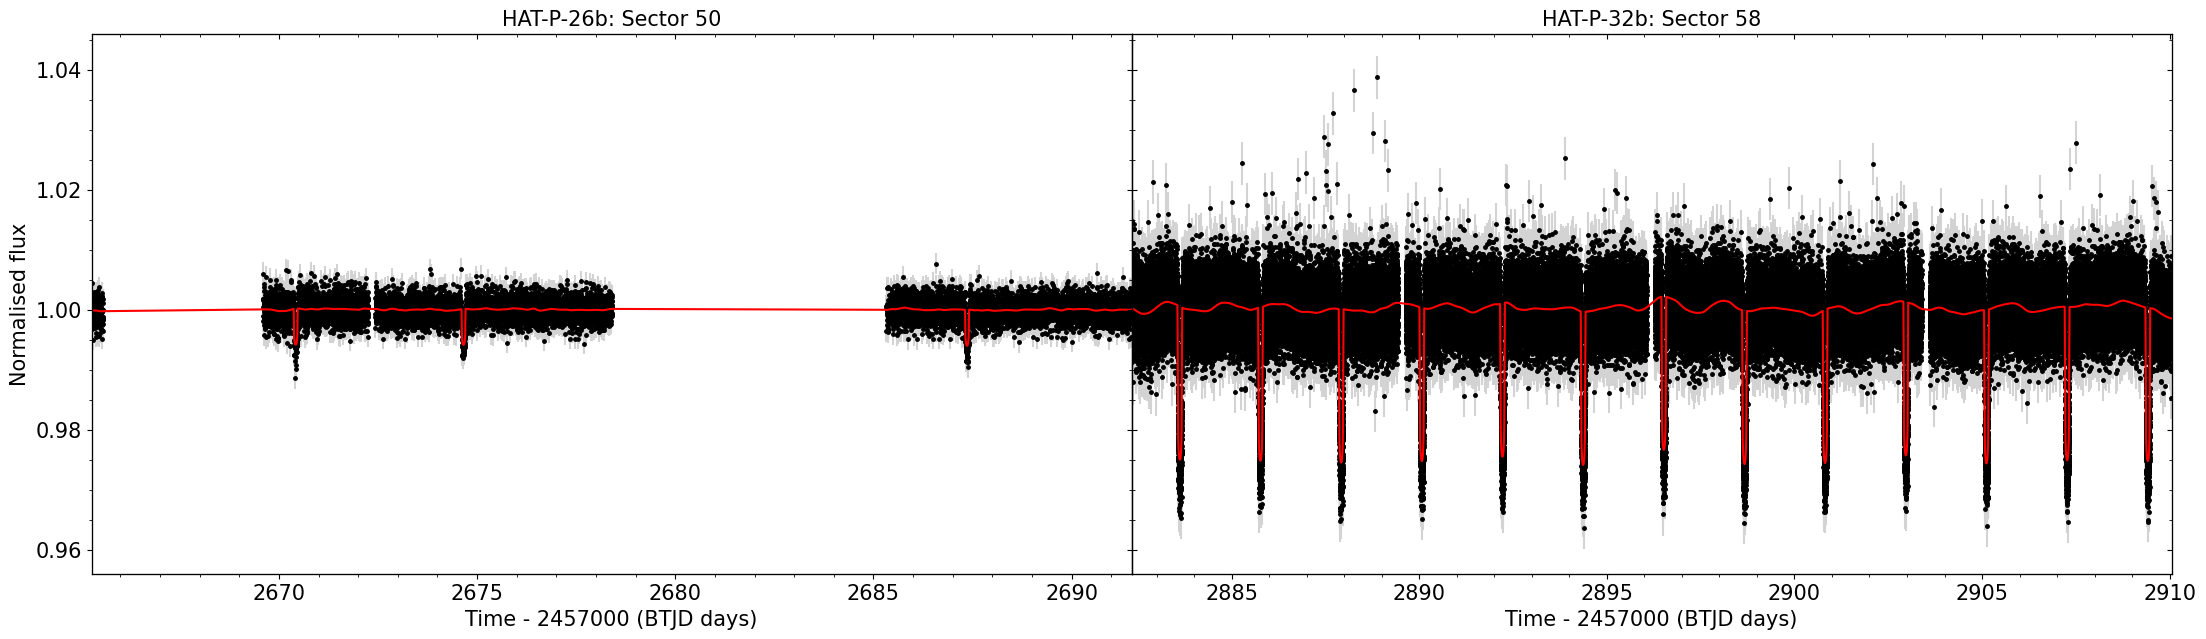

In [10]:
fontsize = 15

#Panel settings
left = 0.1
bottom = 0.1
width = 0.65
height = 0.9
spacing = -height -1.075
w_spacing = 0.075


rect1 = [left, bottom, width, height]
rect2 = [left+width, bottom, width, height]

fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_axes(rect1)
ax2 = fig.add_axes(rect2)


"""
HAT-P-26b, Sector 50
"""
ax1.set_title("HAT-P-26b: Sector 50", size=fontsize)
ax1.errorbar(np.array(HAT_P_26b_t), np.array(HAT_P_26b_flux_data), yerr=np.array(HAT_P_26b_yerrs), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax1.plot(np.array(HAT_P_26b_t), HAT_P_26b_model_flux, color='Red', zorder=10)
ax1.set_xlim(min(HAT_P_26b_t), max(HAT_P_26b_t))
ax1.set_ylim([0.956, 1.046])
ax1.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax1.set_ylabel("Normalised flux", size=fontsize)

# Mirror y
ax1y = ax1.twinx()
ax1y.set_ylim(ax1.get_ylim())
ax1y.get_yaxis().set_ticklabels([])
ax1y.tick_params(which="both", direction="in")

# Mirror x
ax1x = ax1.twiny()
ax1x.set_xlim(ax1.get_xlim())
ax1x.get_xaxis().set_ticklabels([])
ax1x.tick_params(which="both", direction="in")

ax1.yaxis.set_tick_params(labelsize=fontsize)
ax1.xaxis.set_tick_params(labelsize=fontsize)

ax1.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax1.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax1y.yaxis.set_minor_locator(tck.AutoMinorLocator())

"""
HAT-P-32b, Sector 58
"""
ax2.set_title("HAT-P-32b: Sector 58", size=fontsize)
ax2.errorbar(np.array(HAT_P_32b_lc.time.btjd), np.array(HAT_P_32b_lc.flux), yerr=np.array(HAT_P_32b_lc.flux_err), fmt='.', markersize=5, color='black', ecolor='LightGrey', label="Data", zorder=0) #Black
ax2.plot(np.array(HAT_P_32b_lc.time.btjd), HAT_P_32b_model_flux, color='Red', zorder=10)
ax2.set_xlim(min(HAT_P_32b_lc.time.btjd), max(HAT_P_32b_lc.time.btjd))
ax2.set_ylim(ax1.get_ylim())
ax2.set_xlabel("Time - 2457000 (BTJD days)", size=fontsize)
ax2.get_yaxis().set_ticklabels([])
ax2.tick_params(axis="y",which="both", direction="in")

ax2.xaxis.set_tick_params(labelsize=fontsize)

# Mirror y
ax2y = ax2.twinx()
ax2y.set_ylim(ax2.get_ylim())
ax2y.get_yaxis().set_ticklabels([])
ax2y.tick_params(which="both", direction="in")

# Mirror x
ax2x = ax2.twiny()
ax2x.set_xlim(ax2.get_xlim())
ax2x.get_xaxis().set_ticklabels([])
ax2x.tick_params(which="both", direction="in")

ax2.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2x.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax2.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax2y.yaxis.set_minor_locator(tck.AutoMinorLocator())


plt.show()